In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import gc
pd.options.mode.chained_assignment = None

root = 'c:/P2M_TESTS/working_on_it/'

In [113]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

Reading data

In [23]:
df1=pd.read_csv("c:/P2M_TESTS/working_on_it/Data/2017.txt", sep=" " ,delimiter=";")


C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
df2=pd.read_csv("c:/P2M_TESTS/working_on_it/Data/2018.txt", sep=" " ,delimiter=";")

In [74]:
df=pd.concat([df1, df2])

In [75]:
df.tail()

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID
1960989,91,20181231,91648594,2865438133779,71032374.0,2.0,9.091,796985
1960990,91,20181231,91648594,2866480013777,70633122.0,1.0,1.818,796985
1960991,91,20181231,91648594,2866480037979,70632850.0,2.0,3.636,796985
1960992,91,20181231,91648594,2866480037979,70730410.0,1.0,1.818,796985
1960993,91,20181231,91648594,2866480037979,70730412.0,1.0,1.818,796985


In [76]:
df.isnull().sum()

Store_ID         0
Date             0
Basket_ID        0
Structure_ID    11
Article_ID       7
Quantity         0
Amount_Paid      0
Cust_ID          0
dtype: int64

In [77]:
#removing observations tht have null 'Structure_ID'
df = df[pd.notnull(df['Structure_ID'])]

In [14]:
print(df[df['Quantity']<0 ])

         Store_ID      Date  Basket_ID   Structure_ID   Article_ID  Quantity  \
1545           91  20170101   91290281  1173201070159  662000067.0     -3.00   
2933           91  20170102   91027217  1443643010202  436041880.0     -1.00   
2934           91  20170102   91027217  1443643010202  436042700.0     -1.00   
2935           91  20170102   91027217  1443654010702  434001480.0     -1.00   
2936           91  20170102   91027217  1443654010702  434001640.0     -1.00   
...           ...       ...        ...            ...          ...       ...   
1956265        91  20181231   91415076  1114121011126  613480497.0     -2.00   
1957822        91  20181231   91454917  1335523010701  700082008.0     -1.00   
1958054        91  20181231   91476487  1114149020222  645080010.0     -1.00   
1958608        91  20181231   91546329  1203600010701  641784448.0     -1.06   
1960272        91  20181231   91581148  1101168130101  611642657.0     -1.00   

         Amount_Paid  Cust_ID  
1545   

As we can see, there are 3089 rows ( observations ) with negative quantities, they correspond to mistakes made during data collection and must be removed 

In [78]:
# removing observations with negative quantities 
df=df[(df['Quantity']>0)]

In [49]:
df.shape

(3921694, 8)

After doing some cleaning, our dataframe contains 3 921 694 observations in total 

In [79]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [80]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Day of Week'] = df['Date'].dt.dayofweek

<ipython-input-80-f94811dda6a7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


In [81]:
df

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID,Year,Month,Week,Day of Week
0,91,2017-01-01,91010227,2512384190301,392900030.0,1.0,1.390,18579,2017,1,52,6
1,91,2017-01-01,91010227,2544340090301,396900550.0,1.0,2.500,18579,2017,1,52,6
2,91,2017-01-01,91010227,2866718070977,25000135.0,1.0,2.600,18579,2017,1,52,6
3,91,2017-01-01,91010227,2866718070977,25000145.0,1.0,2.450,18579,2017,1,52,6
4,91,2017-01-01,91010227,2866718071177,24400444.0,2.0,5.380,18579,2017,1,52,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1960989,91,2018-12-31,91648594,2865438133779,71032374.0,2.0,9.091,796985,2018,12,1,0
1960990,91,2018-12-31,91648594,2866480013777,70633122.0,1.0,1.818,796985,2018,12,1,0
1960991,91,2018-12-31,91648594,2866480037979,70632850.0,2.0,3.636,796985,2018,12,1,0
1960992,91,2018-12-31,91648594,2866480037979,70730410.0,1.0,1.818,796985,2018,12,1,0


In [82]:
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})
df["Day of Week"] = df["Day of Week"].map(dayofweek_mapping)

In [83]:
df

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID,Year,Month,Week,Day of Week
0,91,2017-01-01,91010227,2512384190301,392900030.0,1.0,1.390,18579,2017,1,52,Sunday
1,91,2017-01-01,91010227,2544340090301,396900550.0,1.0,2.500,18579,2017,1,52,Sunday
2,91,2017-01-01,91010227,2866718070977,25000135.0,1.0,2.600,18579,2017,1,52,Sunday
3,91,2017-01-01,91010227,2866718070977,25000145.0,1.0,2.450,18579,2017,1,52,Sunday
4,91,2017-01-01,91010227,2866718071177,24400444.0,2.0,5.380,18579,2017,1,52,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
1960989,91,2018-12-31,91648594,2865438133779,71032374.0,2.0,9.091,796985,2018,12,1,Monday
1960990,91,2018-12-31,91648594,2866480013777,70633122.0,1.0,1.818,796985,2018,12,1,Monday
1960991,91,2018-12-31,91648594,2866480037979,70632850.0,2.0,3.636,796985,2018,12,1,Monday
1960992,91,2018-12-31,91648594,2866480037979,70730410.0,1.0,1.818,796985,2018,12,1,Monday


then see transactions by month, year, day of the week ..

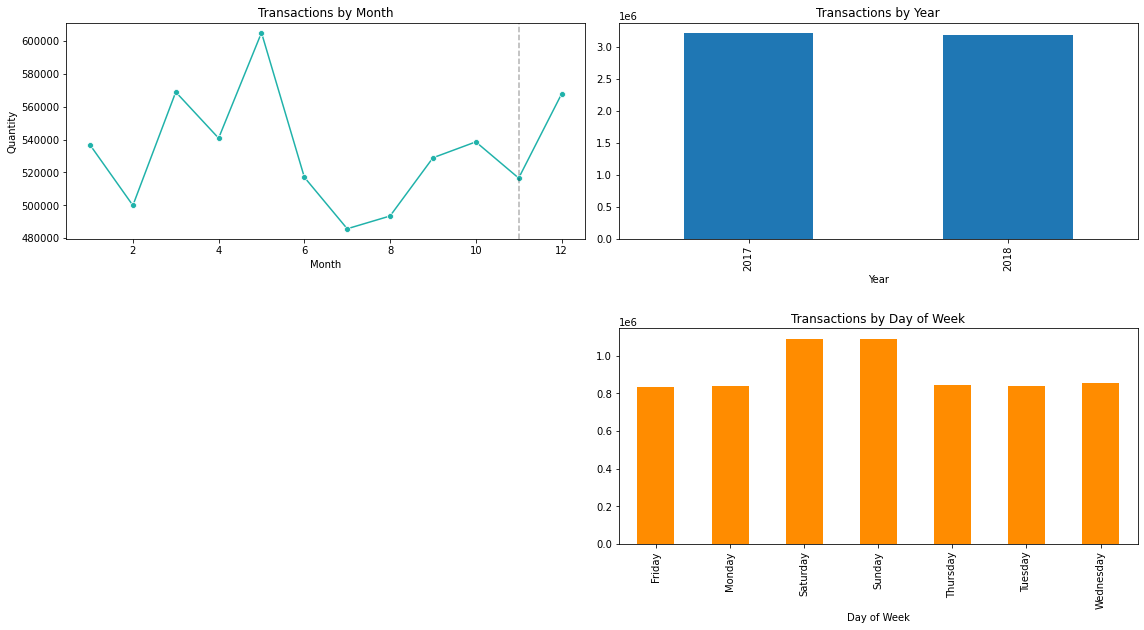

In [84]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = df.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
#plt.text(4.50, 1.3e4, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
df.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
#plt.subplot(3,2,3)
#df.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
#plt.title("Transactions by Quarter")
#plt.subplot(3,2,3)
#sns.lineplot(x = "Day", y = "Quantity", data = df.groupby("Day").sum("Quantity"), marker = "o", )
#plt.axvline(7, color = 'r', linestyle = '--')
#plt.axvline(15, color = 'k', linestyle = "dotted")
#plt.title("Transactions by Day")
plt.subplot(3,2,4)
df.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

 - most transactions happen on the weekends ( saturday and sunday )  and it's practically the same on the other days 
 - no decline in transactions between 2017 and 2018 
 - in summer ( June, July, August ) there is a significant decline in transaction that in other months ??

1. INSIGHT ON PRODUCTS AND CUSTOMERS 

* Let's see which articles are the most popular among users 

In [85]:

product_unique_users = df.groupby('Article_ID')['Cust_ID'].nunique().reset_index().rename(columns={'Cust_ID':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,Article_ID,total_users
32693,556800290.0,8813
40452,848600100.0,7957
38165,715180033.0,7021
39943,842000200.0,6774
39868,841100500.0,6697
37588,681001489.0,6276
39899,841300130.0,6172
36998,660080207.0,5897
39924,841450900.0,5728
39875,841101100.0,5526


Article with the id = 556800290 is the most popular one among customers ( 8813 customers have purchased it ) 

In [89]:
# cumulative sum of unique users (customers) per product 

dfcum = product_unique_users.sort_values("total_users", ascending=False)
dfcum['cum_users'] = dfcum['total_users'].cumsum()
dfcum = dfcum.reset_index(drop=True)
dfcum.head()

,Article_ID,total_users,cum_users
0,556800290.0,8813,8813
1,848600100.0,7957,16770
2,715180033.0,7021,23791
3,842000200.0,6774,30565
4,841100500.0,6697,37262


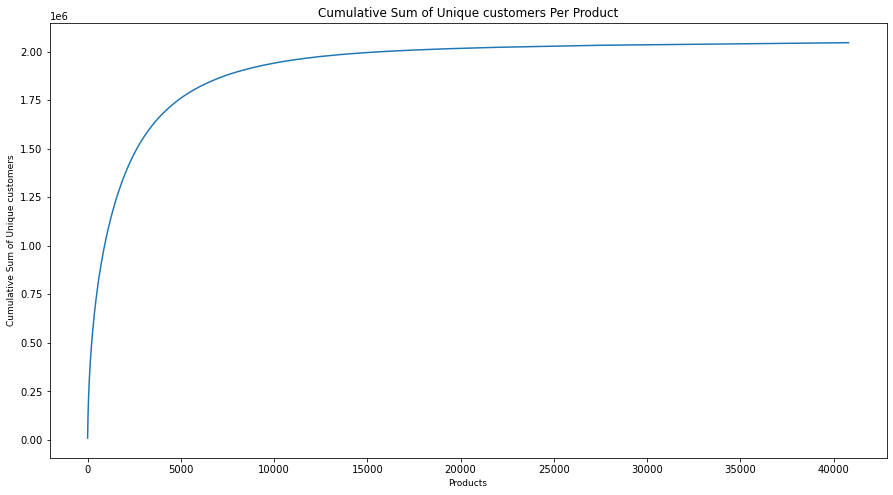

In [90]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = dfcum.index, y=dfcum.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique customers", size = 9)
ax.set_title("Cumulative Sum of Unique customers Per Product", size = 12)
plt.show()

* Which 'rayons' , 'groups' are the most popular among customers 

In [ ]:
##############################################TO DEVELOP#######################

* Frequency of total visits/purchases per customer

In [91]:
df

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID,Year,Month,Week,Day of Week
0,91,2017-01-01,91010227,2512384190301,392900030.0,1.0,1.390,18579,2017,1,52,Sunday
1,91,2017-01-01,91010227,2544340090301,396900550.0,1.0,2.500,18579,2017,1,52,Sunday
2,91,2017-01-01,91010227,2866718070977,25000135.0,1.0,2.600,18579,2017,1,52,Sunday
3,91,2017-01-01,91010227,2866718070977,25000145.0,1.0,2.450,18579,2017,1,52,Sunday
4,91,2017-01-01,91010227,2866718071177,24400444.0,2.0,5.380,18579,2017,1,52,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
1960989,91,2018-12-31,91648594,2865438133779,71032374.0,2.0,9.091,796985,2018,12,1,Monday
1960990,91,2018-12-31,91648594,2866480013777,70633122.0,1.0,1.818,796985,2018,12,1,Monday
1960991,91,2018-12-31,91648594,2866480037979,70632850.0,2.0,3.636,796985,2018,12,1,Monday
1960992,91,2018-12-31,91648594,2866480037979,70730410.0,1.0,1.818,796985,2018,12,1,Monday


## RFM

Frequency : 

In [107]:
#check frequency of customer means how many transaction has been done..

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['Cust_ID','Basket_ID'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('Cust_ID',as_index=False)['Basket_ID'].count()
frequency_df.columns = ['Cust_ID','Frequency']
frequency_df.head()

,Cust_ID,Frequency
0,8,93
1,50,234
2,72,1
3,91,5
4,112,1


Recensy :

In [121]:
ref = datetime.strptime('2017-12', '%Y-%m')
df['last_purchase'] = df.Date.apply(lambda x: \
                                        relativedelta(ref,x).years*12 + relativedelta(ref,x).months)

#since l data teena kolha fi 2017, relativedelta(ref, x).years "diff between ref and x ,years wise" gives us 0 

Recency = df.groupby('Cust_ID').agg({'last_purchase' : 'min'}).copy().rename(columns= {'Mnths_since_purchase':'Recency'})
# recensy: ekher ch'har chré fih ...

In [123]:
#group by customer by last date they purchased...

recency_df = df.groupby(['Cust_ID'],as_index=False)['Date'].max()
recency_df.columns = ['Cust_ID','last_purchase']
recency_df.head()

,Cust_ID,last_purchase
0,8,2018-12-23
1,50,2018-12-31
2,72,2018-12-08
3,91,2018-12-09
4,112,2017-06-18


In [124]:
ref = datetime.strptime('2018-12-31', '%Y-%m-%d')

In [126]:
recency_df['Recency'] = recency_df.last_purchase.apply(lambda x : (ref - x).days)

In [127]:
recency_df.head()

,Cust_ID,last_purchase,Recency
0,8,2018-12-23,8
1,50,2018-12-31,0
2,72,2018-12-08,23
3,91,2018-12-09,22
4,112,2017-06-18,561


* Monetary

In [128]:
#check summed up spend of a customer with respect to latest date..

monetary_df=df.groupby('Cust_ID',as_index=False)['Amount_Paid'].sum()
monetary_df.columns = ['Cust_ID','Monetary']

In [129]:
monetary_df.head()

,Cust_ID,Monetary
0,8,3210.558
1,50,3458.033
2,72,7.580
3,91,109.470
4,112,55.200


In [130]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together..

#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='Cust_ID',right_on='Cust_ID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='Cust_ID',right_on='Cust_ID')

rfm.set_index('Cust_ID',inplace=True)

In [131]:
rfm.head()

,last_purchase,Recency,Frequency,Monetary
Cust_ID,,,,
8,2018-12-23,8,93,3210.558
50,2018-12-31,0,234,3458.033
72,2018-12-08,23,1,7.580
91,2018-12-09,22,5,109.470
112,2017-06-18,561,1,55.200


In [132]:

rfm_segmentation = rfm.copy()

In [138]:
rfm_segmentation=rfm_segmentation.drop('last_purchase', axis=1)

In [139]:
from sklearn.cluster import KMeans

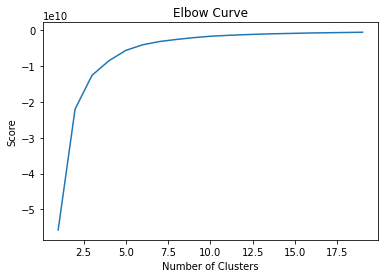

In [140]:

# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [141]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=4, random_state=0).fit(rfm_segmentation)

In [142]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [145]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
Cust_ID,,,,
72,23,1,7.580,0
91,22,5,109.470,0
112,561,1,55.200,0
134,384,6,38.690,0
181,0,34,730.054,0
187,703,1,34.070,0
234,108,3,38.325,0
282,563,5,78.785,0
308,254,4,100.605,0


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Recency'>

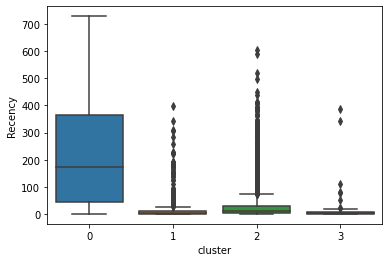

In [146]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 and 3 having low so they are in race of platinum
and gold customer.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

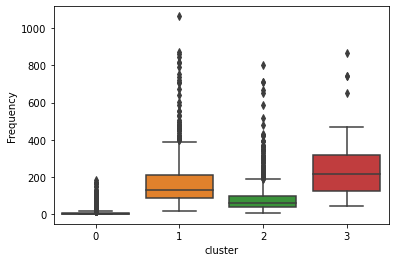

In [147]:

sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

cluster 0 and 2 have low frequency rate, which is bad 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

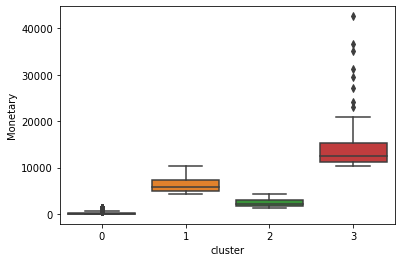

In [148]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

cluster 0 has low monetary rate which is bad, followed by cluster 2 

based in these initial observations, cluster 0 is the worst 
- cluster 3 is gold 
- cluster 1 and 2 are very similar ..